import cvxpy as cp

def sigmoid(x):
    return cp.inv_pos(1+cp.exp(-x)) #https://stackoverflow.com/a/71644683

eps = 0.75
delta = 0.035
gamma = 7

m = cp.Variable(1)
b = cp.Variable(1)

#Eqn 9
def u(a):
    return (1+gamma*delta)*sigmoid(m*a + b)

objective = cp.Minimize(cp.sum(cp.square(delta - u(-eps)) + cp.square(1 + delta - u(0))))

#constraints = []
prob = cp.Problem(objective)

result = prob.solve()

print((m.value, b.value))

https://github.com/cvxpy/cvxpy/discussions/1468#discussioncomment-1278396

from analyzer import tech_support

tech_support(prob)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

class tight_sigmoid(nn.Module):
    def __init__(self, eps, delta, gamma):
        super().__init__()
        
        self.eps = eps
        self.delta = delta
        self.gamma = gamma
        
        self.m = nn.Parameter(torch.zeros(1))
        self.b = nn.Parameter(torch.zeros(1))
        
    def forward(self):
        
        def u(a):
            return (1+self.gamma*self.delta)*torch.sigmoid(self.m*a + self.b)
        
        # obj = torch.sum(torch.square(self.delta - u(-self.eps)) + torch.square(1 + self.delta - u(0)))
        obj = torch.sum(torch.square(1 + self.delta - u(self.eps)) + torch.square(self.delta - u(0)))
        return obj

In [9]:
eps = 0.75
delta = 0.035
gamma = 7

In [10]:
model = tight_sigmoid(eps, delta, gamma)

In [11]:
optimizer = optim.Adam(model.parameters(), lr=1)
#optimizer = optim.LBFGS(model.parameters())

In [12]:
for _ in range(1000):
    optimizer.zero_grad()
    loss = model()
    loss.backward()
    optimizer.step()

In [13]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

m tensor([6.8508])
b tensor([-3.5430])


In [7]:
m, b = model.named_parameters()
m = float(m[1].detach().numpy())
b = float(b[1].detach().numpy())

print((m,b))

(6.850767612457275, 1.5950491428375244)


Fitted values shown in paper (below eqn. 10) are:  
"m = 6.85 and shift b = 1.59"

In [8]:
import numpy as np

def u(a):
    return (1+gamma*delta)/(1 + np.exp(-(m*a + b)))

In [9]:
x = np.linspace(-1, 1, 100)

y = u(x)

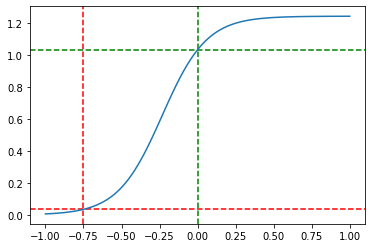

In [10]:
import matplotlib.pyplot as plt

plt.axhline(delta, color='r', linestyle='--')
plt.axvline(-eps, color='r', linestyle='--')

plt.axhline(1+delta, color='g', linestyle='--')
plt.axvline(0, color='g', linestyle='--')

plt.plot(x, y)

Checking if fitted values satisfy the constraints they should (eqn. 8 in paper).  
Each of the two consecutive quantities below should be approximately equal.

In [11]:
u(-eps)

0.03500003437651286

In [12]:
delta

0.035

In [13]:
u(0)

1.0349999943882715

In [14]:
1+delta

1.035

Next step: plot the loss as a function of m,b. Purely to see what it looks like.